# MODELO SDMS MSTAR

In [56]:
from IPython.display import Image

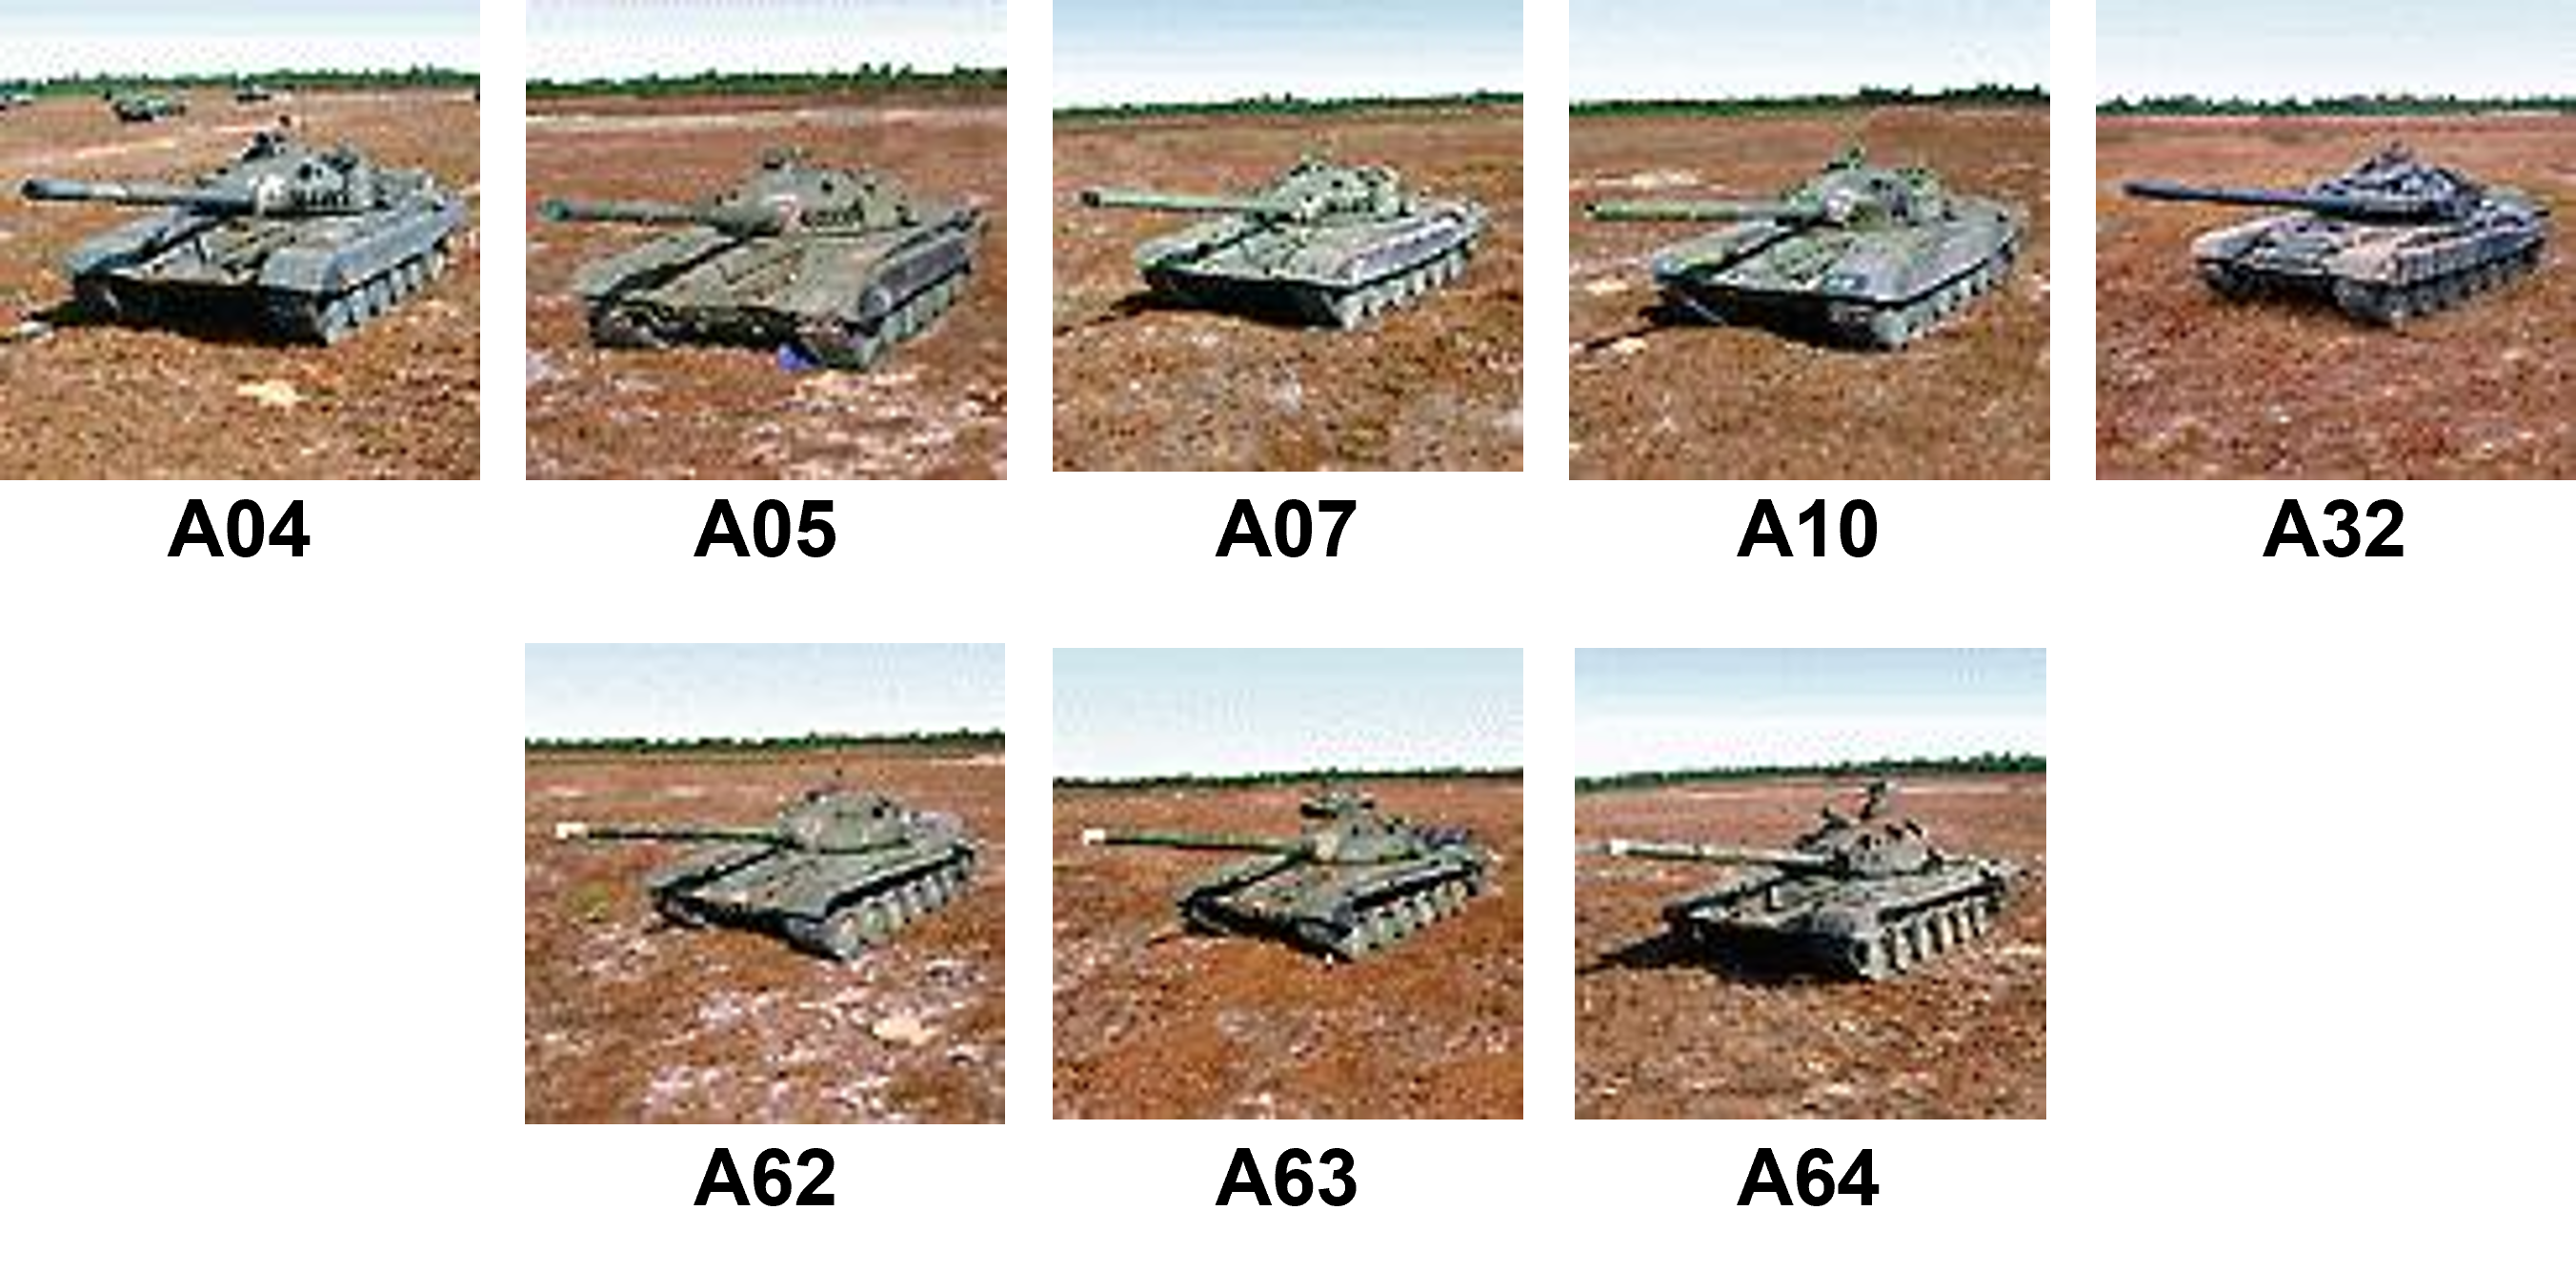

In [59]:
Image(filename=r'D:\Estudos\DataSets SDMS MSTAR\fotos reais\tanks_imagens.png') 

In [48]:
from arcgis.learn import *
import arcpy
import torch
import os
import pandas as pd

In [49]:
out_amostras = r"D:\Estudos\DataSets SDMS MSTAR\T72Variants"

In [50]:
data = prepare_data(out_amostras, 
                    batch_size= 68, 
                    dataset_type="ImageNet", 
                    chip_size =  256,
                    seed = 500,
                    val_split_pct = 0.3,
                    stratify = True)

In [51]:
data

ImageDataBunch;

Train: LabelList (3794 items)
x: ArcGISImageList
ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138)
y: CategoryList
A10,A64,A32,A64,A07
Path: D:\Estudos\DataSets SDMS MSTAR\T72Variants\images;

Valid: LabelList (1627 items)
x: ArcGISImageList
ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138),ArcGISMSImage (3, 138, 138)
y: CategoryList
A32,A32,A04,A05,A32
Path: D:\Estudos\DataSets SDMS MSTAR\T72Variants\images;

Test: None

In [52]:
data.classes

['A04', 'A05', 'A07', 'A10', 'A32', 'A62', 'A63', 'A64']

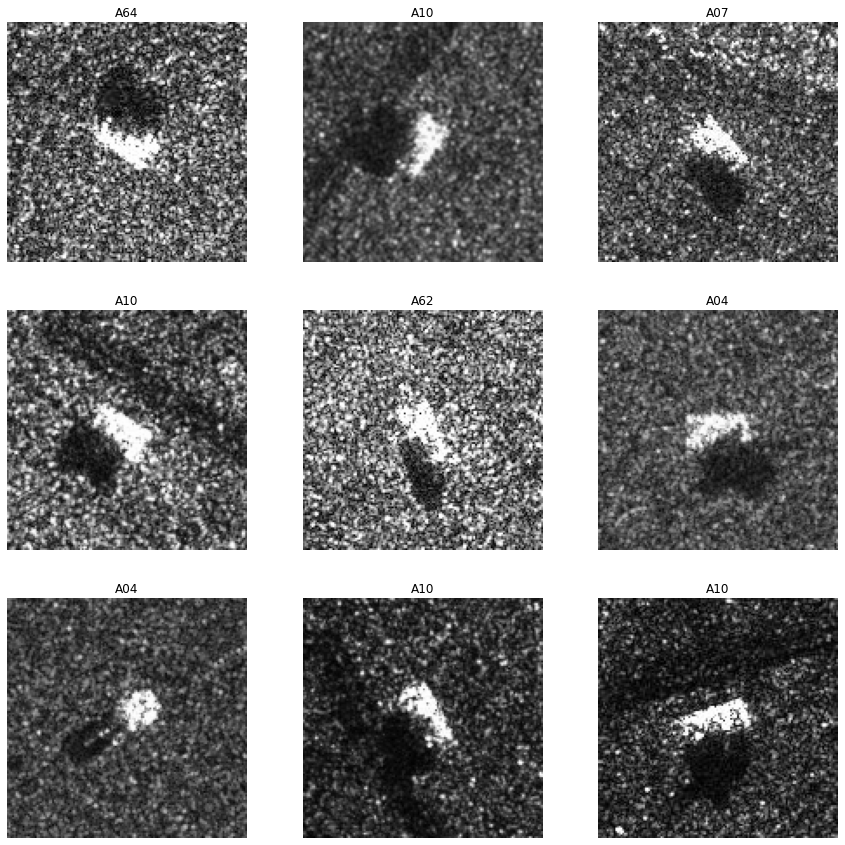

In [53]:
data.show_batch()

In [54]:
model =  FeatureClassifier(data, backbone = "resnet50",
                          oversample = True)

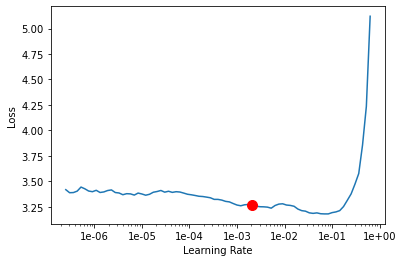

Learning Rate: 0.0020892961308540407


In [55]:
lr = model.lr_find()
print("Learning Rate:",lr)

In [60]:
model.fit(300, lr =lr,
          early_stopping = True,
          checkpoint=True) 

Epoch 43: early stopping


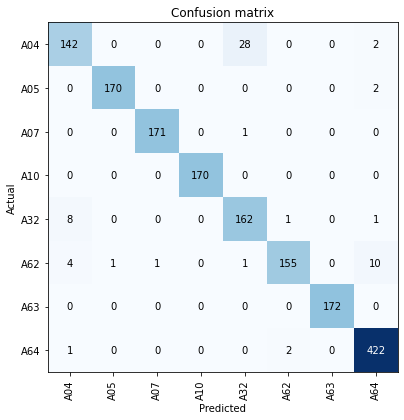

In [61]:
model.plot_confusion_matrix()

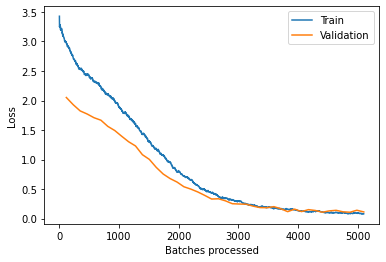

In [62]:
model.plot_losses()

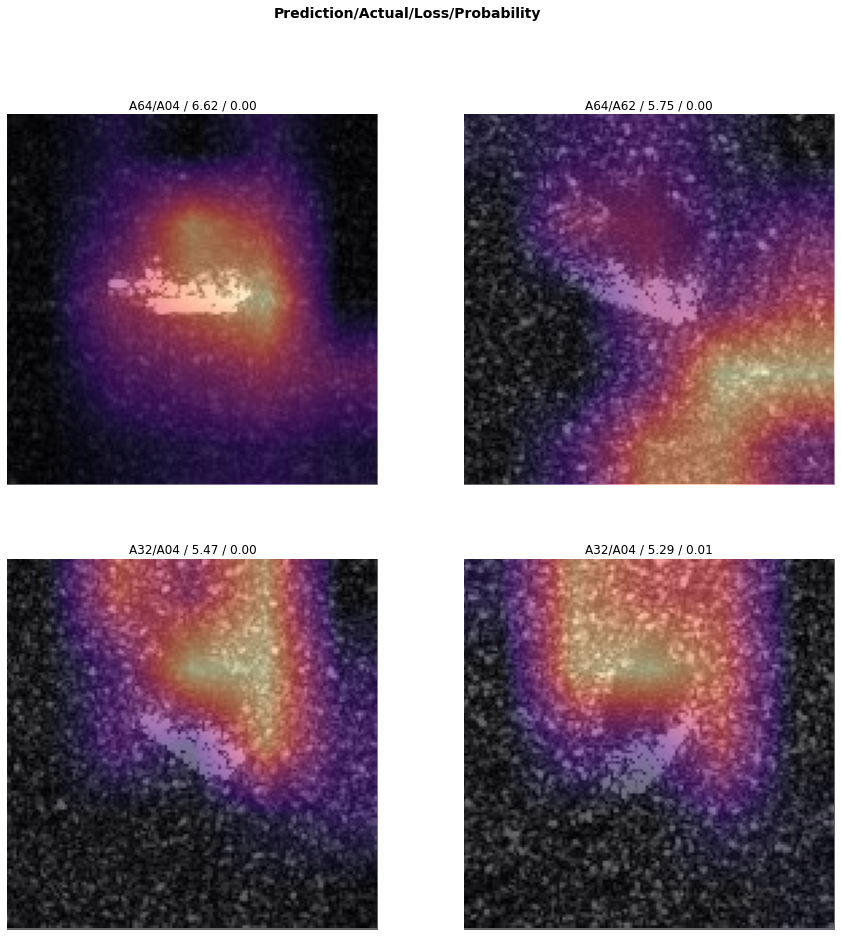

In [64]:
model.plot_hard_examples(4)

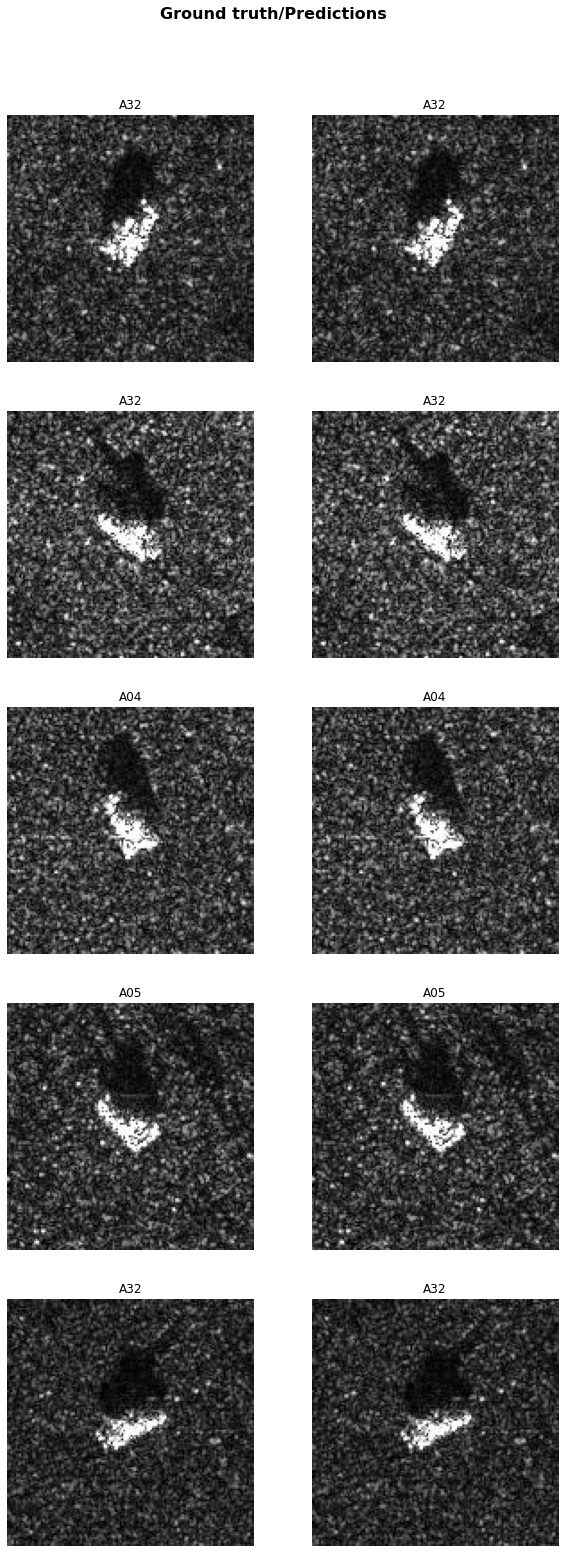

In [65]:
model.show_results()

In [66]:
model.save('MODEL_SDMS_MSTAR_V02')

Computing model metrics...


WindowsPath('D:/Estudos/DataSets SDMS MSTAR/T72Variants/models/MODEL_SDMS_MSTAR_V02')

## Inferência do modelo

In [67]:
def read_metadata(diretorio):
    
    lista_files = []
    for path in os.scandir(dir_teste):
            if path.is_file():
                if not path.name.endswith(".JPG"):
                        img_test1_char = pd.read_fwf(diretorio+path.name,
                                 encoding= 'unicode_escape').iloc[12][0][-3:]
                        lista_files.append(img_test1_char)

    return lista_files

In [68]:
dir_teste = r"D:\Estudos\DataSets SDMS MSTAR\T72Variants\teste\\"
image1 = "HB14937.JPG"
image2 = "HB14961.JPG"

In [69]:
read_metadata(dir_teste)

['A04', 'A63']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Category tensor(0),
 tensor(0),
 tensor([9.9994e-01, 2.3299e-11, 2.2559e-09, 2.5921e-07, 5.8791e-05, 9.5005e-09,
         9.1747e-07, 4.4501e-08]))

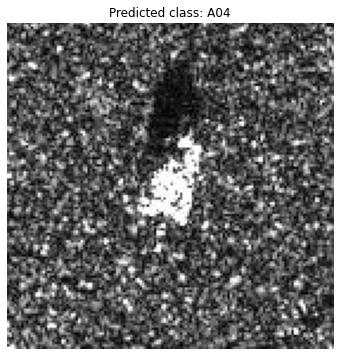

In [70]:
model.predict(f"{dir_teste}\\{image1}", visualize=True, gradcam=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Category tensor(6),
 tensor(6),
 tensor([1.3371e-13, 2.5978e-11, 6.0780e-15, 4.8319e-10, 1.5605e-13, 4.1446e-14,
         1.0000e+00, 5.8066e-16]))

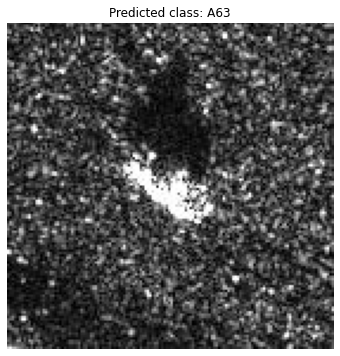

In [71]:
model.predict(f"{dir_teste}\\{image2}", visualize=True, gradcam=False)